# Exercise, discrete data

## Recap

*GLMs* consist of
1. A linear predictor of a linear model
$$
\eta = \beta_0 + \Sigma_j x_{ij} \beta_j \in_i
$$
2. A link function $g$, which places the predictor on a Gaussian scale
$$
y = g^{-1} (\eta)
$$

### Binomial distribution

The binomial distribution summarizes Bernoulli trials, which are trials where either 0 or 1 is possible. Its parameters are
- $n$: number of trials
- $p$: proportion of trials with positive outcomes

Variance of binomial distribution is defined as
$$
\sigma^2 = np(1-p)
$$

## Poisson and negative-binomial regression

The poisson distribution "looks like" a distribution you get when you gather count data.

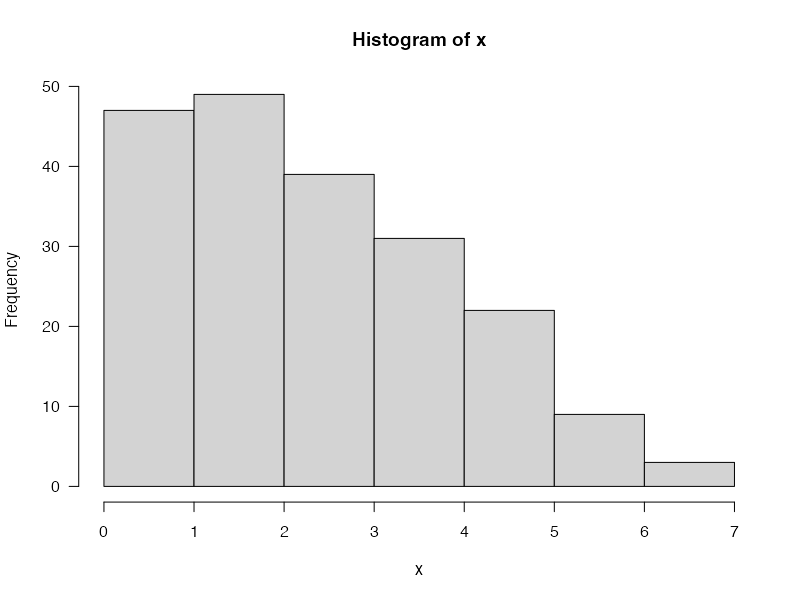

In [13]:
x <- rpois(200, 3)
par(mfrow = c(1, 1))
hist(x, las = 1)

The parameter $\lambda$ determines both mean and variance. In other words, $\sigma^2 = \mu$. Higher $\lambda$ makes the distribution approach normal.

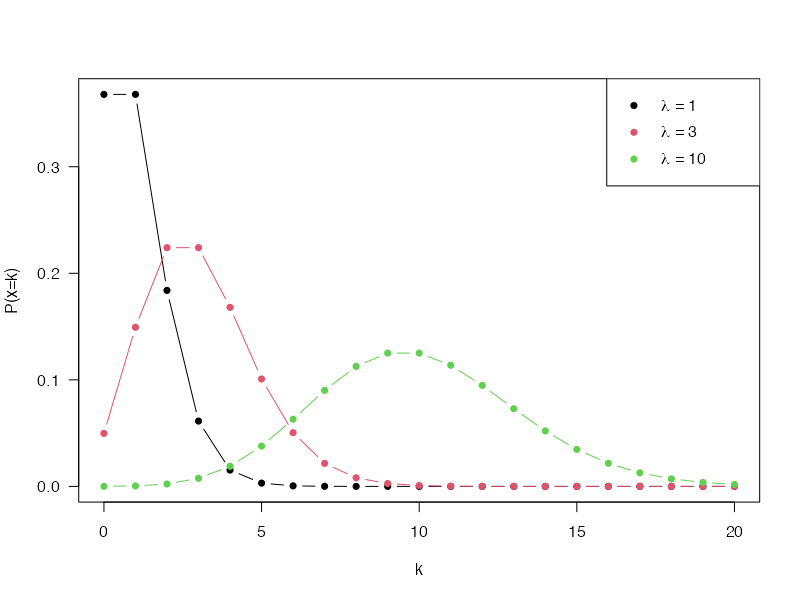

In [14]:
x = seq(0, 20, 1)
y = dpois(x, lambda=1)
plot(x,y, type="b", las=1, xlab="k", ylab="P(x=k)", pch=16, col=1)
points(x, dpois(x, lambda=3), type="b", pch=16, col=2)
points(x, dpois(x, lambda=10), type="b", pch=16, col=3)
legend(
  "topright", col=1:3, pch=16, legend=c(expression(paste(lambda, " = 1")),
  expression(paste(lambda, " = 3")), expression(paste(lambda, " = 10")))
)

The **link function** for Poisson regression is the log. Log-transforming data can be problematic when there are 0's in the count, since the log of 0 is undefined.

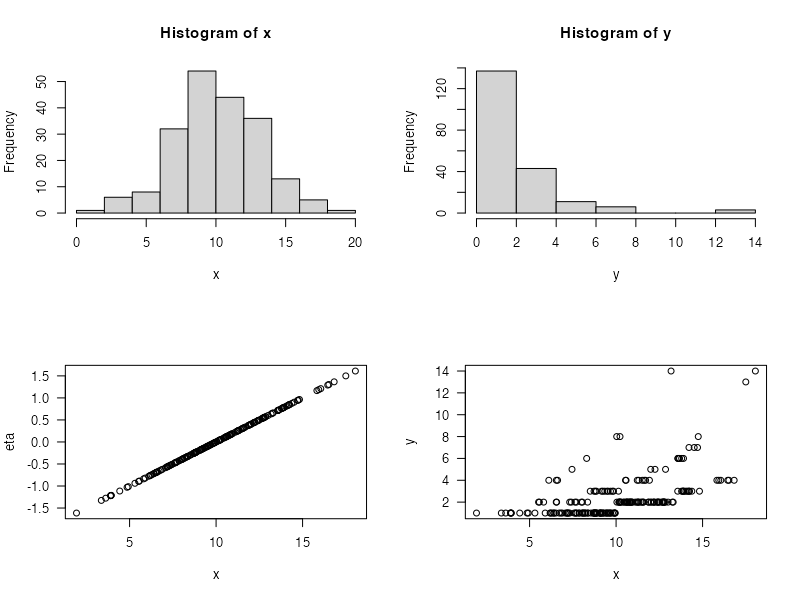

In [72]:
x = rnorm(200, 10, 3)
eta = -2 + 0.2*x
y = ceiling(exp(eta + rpois(200, 0.3)))

par(mfrow=c(2,2))
hist(x)
hist(y)
plot(x, eta, las=1)
plot(x, y, las=1)

In [73]:
m = glm(y~x, family="poisson")
summary(m)


Call:
glm(formula = y ~ x, family = "poisson")

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.77095    0.17891  -4.309 1.64e-05 ***
x            0.15560    0.01508  10.320  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 250.05  on 199  degrees of freedom
Residual deviance: 142.83  on 198  degrees of freedom
AIC: 670.18

Number of Fisher Scoring iterations: 4


Keep in mind that parameters reported in the link scale (here log). On the link scale, a change in x represents a % change in y.

To plot the regression line, we need to back-transform the data to the data scale. Green represents the 95% confidence interval.

$fit
        1         2         3         4         5         6         7 
0.6247179 0.6256907 0.6266651 0.6276409 0.6286182 0.6295971 0.6305775 
        8         9        10        11        12        13        14 
0.6315594 0.6325429 0.6335279 0.6345144 0.6355025 0.6364921 0.6374832 
       15        16        17        18        19        20        21 
0.6384759 0.6394701 0.6404659 0.6414632 0.6424621 0.6434625 0.6444645 
       22        23        24        25        26        27        28 
0.6454681 0.6464732 0.6474799 0.6484881 0.6494979 0.6505093 0.6515223 
       29        30        31        32        33        34        35 
0.6525368 0.6535529 0.6545707 0.6555899 0.6566108 0.6576333 0.6586573 
       36        37        38        39        40        41        42 
0.6596830 0.6607102 0.6617391 0.6627695 0.6638016 0.6648353 0.6658705 
       43        44        45        46        47        48        49 
0.6669074 0.6679459 0.6689860 0.6700278 0.6710711 0.6721161 0.6731627 
 

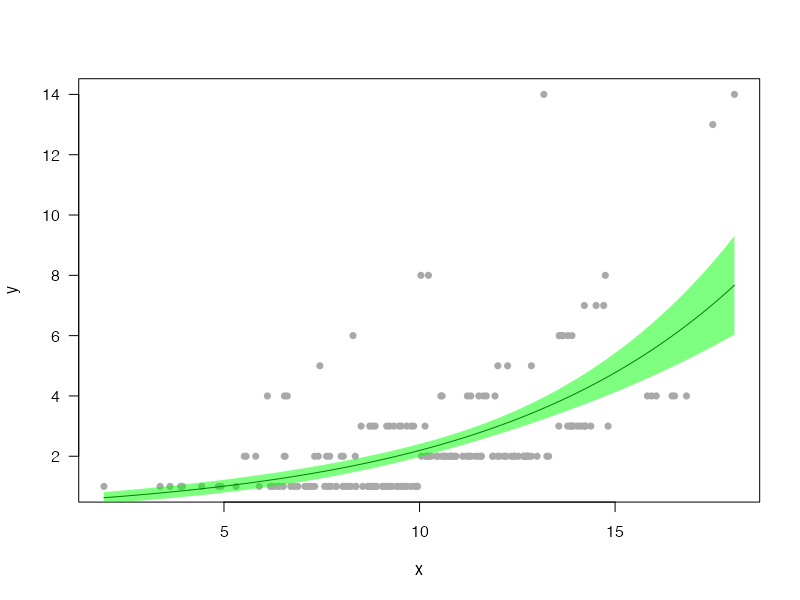

In [ ]:
par(mfrow=c(1,1))
plot(x, y, las=1, col="darkgrey", pch=16)
xx = seq(min(x), max(x), 0.01)
y_hat = predict(m, newdata=list(x=xx), type="response", se.fit=T)
lines(xx, y_hat$fit)
#lines(xx, y_hat$fit+1.96*y_hat$se.fit, lty=2)
#lines(xx, y_hat$fit-1.96*y_hat$se.fit, lty=2)
polygon(c(xx, rev(xx)), c(y_hat$fit+1.96*y_hat$se.fit, rev(y_hat$fit-1.96*y_hat$se.fit)), col = rgb(0,1,0,.5), border = FALSE)

As for other GLMs, there is no $r^2$. A pseudo-$r^2$ can be defined as

$$
1 - \frac{Residual \; variance}{Null \; variance}
$$

Representing the variance explained by the model.

We can also use `r.squaredGLMM`, which gives another pseudo-$r^2$.

In [18]:
1-(m$deviance/m$null.deviance)

[1] 0.4008436

In [19]:
# r.squaredGLMM(m)

*Deviance* is sort of like variance.

*Overdispersion* is when the variance increases more than the mean. In other words, if the mean is x, the variance is likely greater than x.

To quantify overdispersion, we can compare residual deviance and residual degrees of freedom.

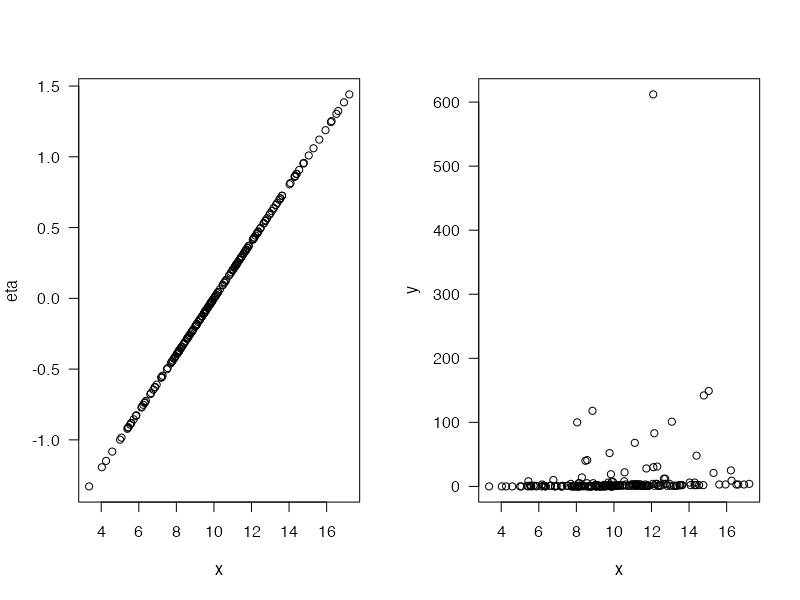

In [20]:
set.seed(1)
x = rnorm(200, 10, 3)
eta = -2 + 0.2*x
y = floor(exp(eta + rnbinom(200, 1, mu=.8)))

par(mfrow=c(1,2))
plot(x, eta, las=1)
plot(x, y, las=1)

In [21]:
m = glm(y~x, family="poisson")
summary(m)


Call:
glm(formula = y ~ x, family = "poisson")

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.054938   0.094237  -0.583     0.56    
x            0.217419   0.007729  28.129   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 8793.6  on 199  degrees of freedom
Residual deviance: 8005.2  on 198  degrees of freedom
AIC: 8452.8

Number of Fisher Scoring iterations: 7


In this example we need a new model that allows greater increase in variance for a given increase in mean. Solution: **negative binomial distribution**.

In [22]:
library(MASS)
m = glm.nb(y~x)
summary(m)


Call:
glm.nb(formula = y ~ x, init.theta = 0.2993347963, link = log)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.17822    0.50977  -2.311   0.0208 *  
x            0.31932    0.04817   6.628 3.39e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.2993) family taken to be 1)

    Null deviance: 248.15  on 199  degrees of freedom
Residual deviance: 215.64  on 198  degrees of freedom
AIC: 1083.2

Number of Fisher Scoring iterations: 1


              Theta:  0.2993 
          Std. Err.:  0.0304 

 2 x log-likelihood:  -1077.2360 

## Exercise: bee distribution

The data contains abundances of bee *E. nigrita*.

In [23]:
library(here)

In [24]:
dat = read.csv(here("Exercises", "Exercise-6-Poisson", "Data", "Eulaema.csv"))
print(names(dat))
print(head(dat))

 [1] "Eulaema_nigrita" "SA"              "SU"              "method"         
 [5] "effort"          "altitude"        "MAT"             "MAP"            
 [9] "Tseason"         "Pseason"         "forest."         "lu_het"         
  Eulaema_nigrita
1             492
2             372
3             679
4             600
5              28
6             535
                                                              SA  SU   method
1                                                Morro_do_Itaoca 1-1 NetTraps
2                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba 2-1    Traps
3                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba 2-2    Traps
4                                                  Mata_do_Funil 2-3    Traps
5 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape 6-1      Net
6 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape 6-2      Net
    effort altitude MAT  MAP Tseason Pseason    forest.    lu_het
1 4.189655        6 235 1073   

In [25]:
m = glm(Eulaema_nigrita~effort+altitude+MAT, "poisson", data=dat)

### Original work

In [28]:
summary(m)


Call:
glm(formula = Eulaema_nigrita ~ effort + altitude + MAT, family = "poisson", 
    data = dat)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.3246665  0.1739506  -7.615 2.63e-14 ***
effort       0.3414200  0.0039228  87.034  < 2e-16 ***
altitude     0.0009338  0.0000449  20.799  < 2e-16 ***
MAT          0.0171531  0.0007053  24.322  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 23280  on 177  degrees of freedom
Residual deviance: 16998  on 174  degrees of freedom
AIC: 17931

Number of Fisher Scoring iterations: 6


In [149]:
mp <- glm(dat$Eulaema_nigrita~dat$Pseason, "poisson")  # Fit poisson model
summary(mp)


Call:
glm(formula = dat$Eulaema_nigrita ~ dat$Pseason, family = "poisson")

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 3.2767286  0.0261703   125.2   <2e-16 ***
dat$Pseason 0.0204149  0.0004201    48.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 23280  on 177  degrees of freedom
Residual deviance: 20785  on 176  degrees of freedom
AIC: 21713

Number of Fisher Scoring iterations: 6


In [150]:
mb <- glm.nb(dat$Eulaema_nigrita~dat$Pseason)  # Fit negative binomial model
summary(mb)


Call:
glm.nb(formula = dat$Eulaema_nigrita ~ dat$Pseason, init.theta = 0.6662838264, 
    link = log)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 2.957642   0.239414  12.354  < 2e-16 ***
dat$Pseason 0.026200   0.004371   5.994 2.04e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.6663) family taken to be 1)

    Null deviance: 241.17  on 177  degrees of freedom
Residual deviance: 213.54  on 176  degrees of freedom
AIC: 1868.2

Number of Fisher Scoring iterations: 1


              Theta:  0.6663 
          Std. Err.:  0.0637 

 2 x log-likelihood:  -1862.1800 

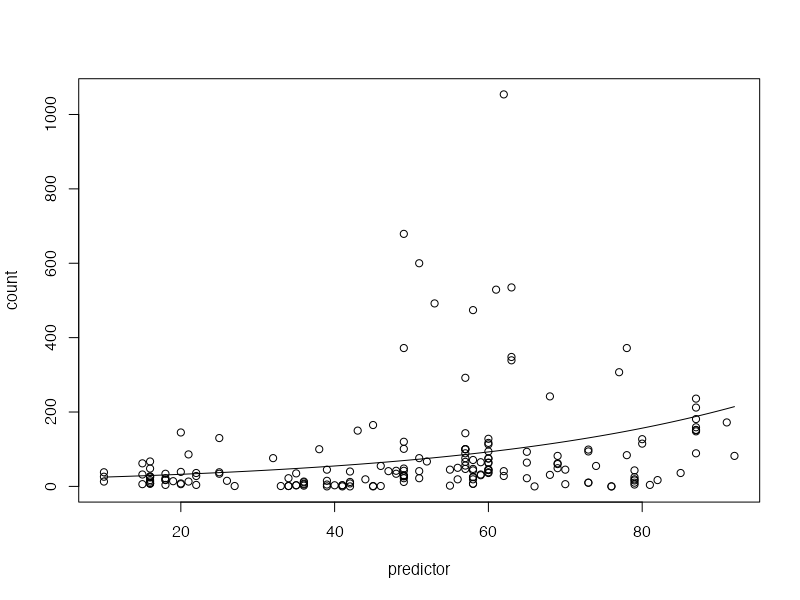

In [152]:
## Plot data
count <- dat$Eulaema_nigrita  # Assign counts
predictor <- dat$Pseason  # Assign predictor

par(mfrow = c(1, 1))  # Force 1 subplot
plot(predictor, count)  # Plot data


## Plot linear predictor
coefs <- mb$coefficients  # Get coefficients from model

predictor_seq <- seq(min(predictor), max(predictor), 0.01)  # Generate x sequence to use for prediction
prediction <- exp(predictor_seq * (coefs[2]) + coefs[1])  # Predict response for each value in x sequence

points(predictor_seq, prediction, type = "l")  # Plot predictor as a line
# Plot 95% confidence intervals

### Hurdle models

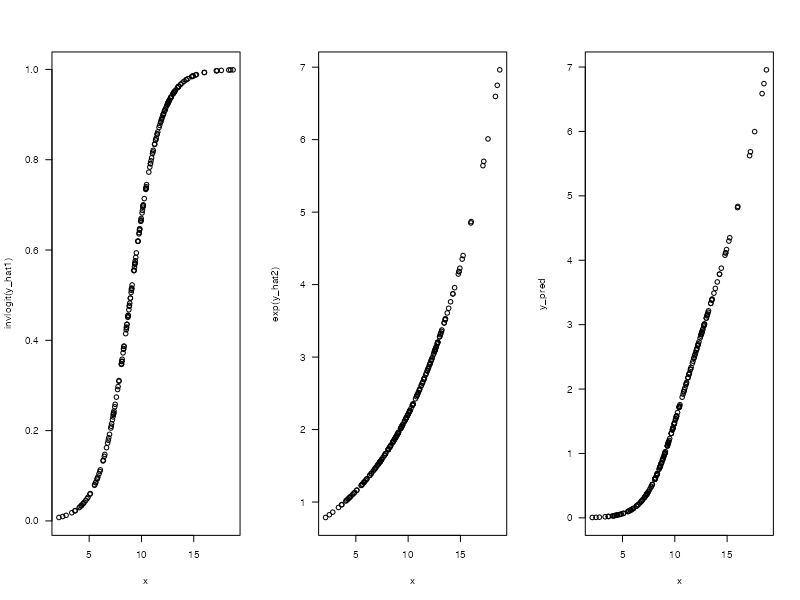

In [46]:
logit = function(x) log(x/(1-x))
invlogit = function(x) 1/(1+exp(-x))

y1 = ((y>1)*1)
m1 = glm(y1~x, family="binomial" (link="logit"))
y2 = y
y2[which(y==0)] = NA
m2 = glm(y2~x, family="poisson", na=na.exclude)
coefs1 = summary(m1)$coef
coefs2 = summary(m2)$coef
y_hat1 = coefs1[1,1] + coefs1[2,1]*x
y_hat2 = coefs2[1,1] + coefs2[2,1]*x
y_pred = invlogit(y_hat1)*exp(y_hat2)
par(mfrow=c(1,3))
plot(x, invlogit(y_hat1), las=1)
plot(x, exp(y_hat2), las=1)
plot(x, y_pred, las=1)